# Using kNN to Predict the Age of Sea Slugs

# The Abalone Problem Statement

**The age of an abalone can be found by cutting its shell and counting the number of rings on the shell. In the Abalone Dataset, you can find the age measurements of a large number of abalones along with a lot of other physical measurements.**

**The goal of the project is to develop a model that can predict the age of an abalone based purely on the other physical measurements. This would allow researchers to estimate the abalone’s age without having to cut its shell and count the rings.**

**I'll be applying a kNN to find the closest prediction score possible.**

# Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing the Abalone Dataset

In [2]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

In [3]:
abalone = pd.read_csv(url,header=None)

In [4]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

**The goal of the current exercise is to use physical measurements to predict the age of the abalone. Since sex is not a purely physical measure, we should remove it from the dataset.**

In [6]:
abalone = abalone.drop('Sex', axis=1)

# Descriptive Statistics From the Abalone Dataset

When working on machine learning, you need to have an idea of the data you’re working with. Without going into too much depth, here’s a look at some exploratory statistics and graphs.

The target variable of this exercise is Rings, so you can start with that. A histogram will give you a quick and useful overview of the age ranges that you can expect:

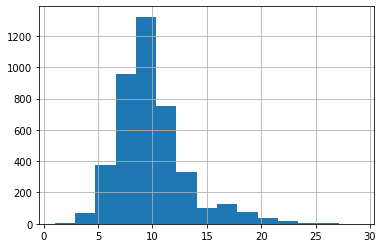

In [7]:
abalone['Rings'].hist(bins=15)
plt.show()

In [8]:
correlation_matrix = abalone.corr()
correlation_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

# A Step-by-Step kNN From Scratch in Python

### Define “Nearest” Using a Mathematical Definition of Distance

In [9]:
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a-b)

2.8284271247461903

### Find the k Nearest Neighbors

In [10]:
X = abalone.drop('Rings', axis=1).values
y = abalone['Rings'].values

***You can create the NumPy array for this data point as follows:***

In [11]:
new_data_point = np.array([0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208])

In [12]:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [13]:
k = 3

In [14]:
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644], dtype=int64)

**This tells we which three neighbors are closest to your new_data_point. In the next paragraph, you’ll see how to convert those neighbors in an estimation.**

### Voting or Averaging of Multiple Neighbors

In [15]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10], dtype=int64)

**Now that we have the values for those three neighbors, you’ll combine them into a prediction for your new data point. Combining the neighbors into a prediction works differently for regression and classification.**

### Average for Regression

In [16]:
prediction = nearest_neighbor_rings.mean()

### Mode for Classification

In [17]:
import scipy.stats
class_neighbors = np.array(['A','B','B','C'])
scipy.stats.mode(class_neighbors)

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

# Fit kNN in Python Using scikit-learn

### Splitting Data Into Training and Test Sets for Model Evaluation

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

### Fitting a kNN Regression in scikit-learn to the Abalone Dataset

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [21]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

### Using scikit-learn to Inspect Model Fit

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.653705966446084

In [25]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

# Plotting the Fit of Your Model

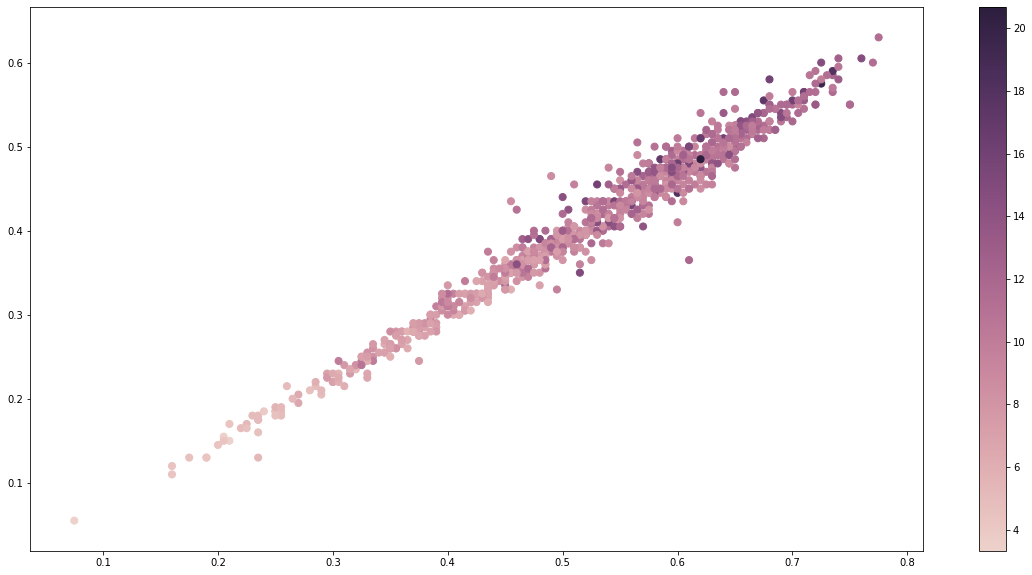

In [37]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

**We use c to specify that the predicted values (test_preds) should be used as a colorbar.**

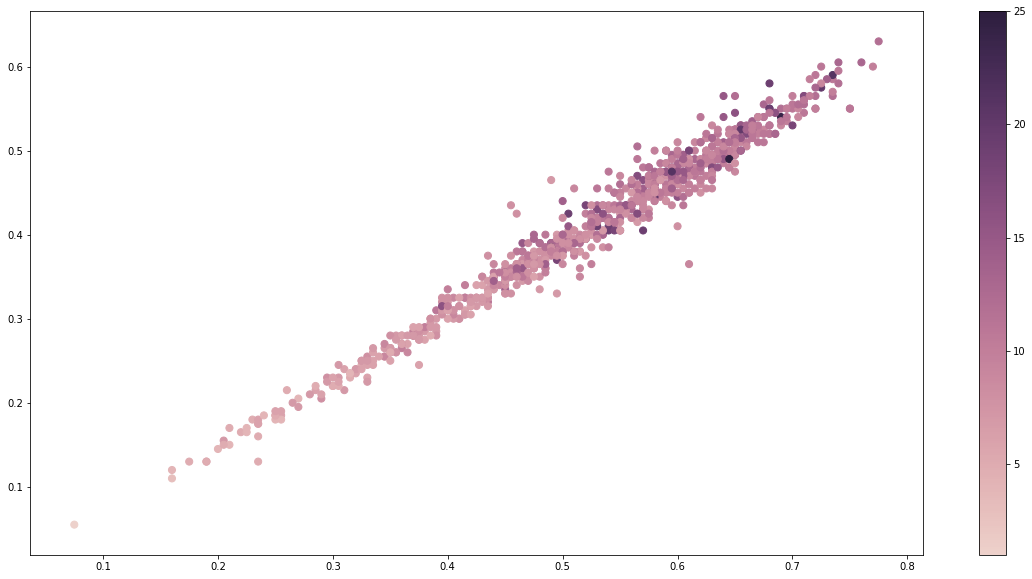

In [42]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

**This confirms that the trend our model is learning does indeed make sense.**

# Tune and Optimize kNN in Python Using scikit-learn

In [43]:
from sklearn.model_selection import GridSearchCV

### Improving kNN Performances in scikit-learn Using GridSearchCV

In [44]:
parameters = {'n_neighbors' : range(1,50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 50)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [45]:
gridsearch.best_params_

{'n_neighbors': 25}

In [46]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

In [47]:
train_rmse

2.0731294674202143

In [48]:
test_rmse

2.1700197339962175

### Adding Weighted Average of Neighbors Based on Distance

In [49]:
parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
gridsearch.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [51]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.163426558494748

# The End!